## _Company Sales Dataset_

 __Import Necessary Libraries__

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('company_data.csv')
data

,Year,Month,Sales,Expenses,Profit,Region,Product_Type
0,2018,January,10000.0,6000.0,4000.0,East,Electronics
1,2018,February,15000.0,7000.0,8000.0,West,Apparel
2,2018,March,12000.0,5000.0,7000.0,East,Electronics
3,2018,April,18000.0,8000.0,10000.0,South,Electronics
4,2018,May,9000.0,4000.0,5000.0,West,Apparel
...,...,...,...,...,...,...,...
103,2026,August,12000.0,6000.0,6000.0,West,Electronics
104,2026,September,15000.0,7000.0,8000.0,East,Electronics
105,2026,October,18000.0,8000.0,10000.0,South,Electronics
106,2026,November,9000.0,4000.0,5000.0,West,Apparel


__Data Cleaning__

In [3]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Year            0
Month           0
Sales           1
Expenses        1
Profit          1
Region          0
Product_Type    0
dtype: int64


In [12]:
# Fill missing values with mean for 'Expenses' and 'Profit', and fill 'Year' with preceding number
data['Expenses'].fillna(data['Expenses'].mean(), inplace=True)
data['Profit'].fillna(data['Profit'].mean(), inplace=True)
data['Sales'].fillna(data['Sales'].mean(), inplace=True)
data['Year'].fillna(method='ffill', inplace=True)
print(data.isnull().sum())

Year            0
Month           0
Sales           0
Expenses        0
Profit          0
Region          0
Product_Type    0
dtype: int64


__Descriptive Statistics__

In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              Year         Sales      Expenses        Profit
count   108.000000    108.000000    108.000000    108.000000
mean   2022.000000  17373.831776   8336.448598   9009.345794
std       2.594026   5057.655185   2550.220534   2677.337662
min    2018.000000   9000.000000   4000.000000   4000.000000
25%    2020.000000  12000.000000   6000.000000   6750.000000
50%    2022.000000  18000.000000   8000.000000   9504.672897
75%    2024.000000  20500.000000  10000.000000  10000.000000
max    2026.000000  30000.000000  15000.000000  15000.000000


In [24]:
num_data=data.select_dtypes(include=[np.number])
print(num_data.corr())

              Year     Sales  Expenses    Profit
Year      1.000000 -0.023241 -0.034843 -0.014790
Sales    -0.023241  1.000000  0.957973  0.963221
Expenses -0.034843  0.957973  1.000000  0.855474
Profit   -0.014790  0.963221  0.855474  1.000000


__Data Visualization__

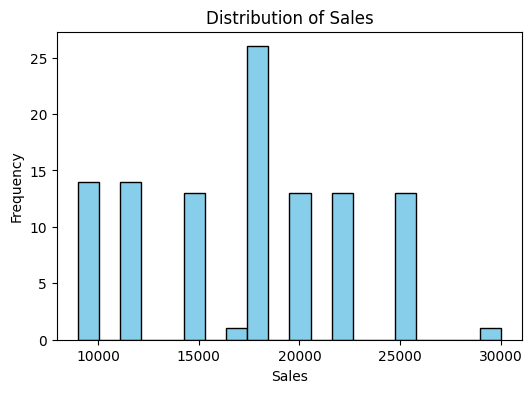

In [19]:
# Histogram of sales
plt.figure(figsize=(6, 4))
plt.hist(data['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

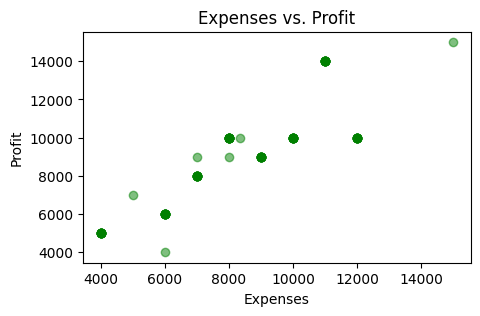

In [7]:
# Scatter plot of expenses vs. profit
plt.figure(figsize=(5, 3))
plt.scatter(data['Expenses'], data['Profit'], color='green', alpha=0.5)
plt.title('Expenses vs. Profit')
plt.xlabel('Expenses')
plt.ylabel('Profit')
plt.show()

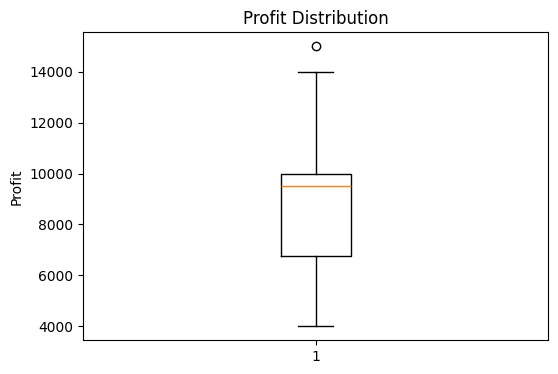

In [20]:
# Boxplot of profit
plt.figure(figsize=(6, 4))
plt.boxplot(data['Profit'])
plt.title('Profit Distribution')
plt.ylabel('Profit')
plt.show()